<a href="https://colab.research.google.com/github/sadjadasghari/Colab/blob/main/SewerAI_Code_Problem_Sadjad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions

Run Length Encoding (RLE) is a simple compression method that is often used for binary image masks.

When flattened, a binary mask is just a series of 0/1 values. RLE compresses this into counts of adjacent equal values.

Given this 3x3 mask as an example

    0 1 1
    1 0 0
    0 1 0

Flattened it becomes:

    [0, 1, 1, 1, 0, 0, 0, 1, 0]

RLE alternates between counts of 0's and 1's, starting with 0. So the RLE for the above mask is:

    [1,3,3,1,1]


Your task is to take a RLE encoding mask given as a Numpy array, convert it to an image, and display that image. You can use any standard python library, Numpy, and any plotting library to display the image. Feel free to use the Numpy documentation if neeeded.

The original mask dimensions are 640 width x 480 height.

For simplicity, you can assume that the first bit in the mask is 0, and that the RLE array spans the entire image.

In [2]:
import numpy as np

In [3]:
rle = np.array([131322, 2, 631, 16, 314, 9, 46, 6, 245, 23, 309, 13, 41, 11, 241, 28, 305, 15, 40, 12, 238, 32, 303, 15, 40, 12, 237, 34, 301, 17, 39, 12, 236, 36, 300, 17, 39, 12, 235, 38, 299, 18, 38, 12, 234, 39, 298, 19, 38, 12, 233, 40, 298, 19, 38, 12, 232, 20, 3, 18, 298, 20, 37, 12, 232, 15, 14, 12, 297, 21, 37, 12, 231, 14, 18, 10, 297, 21, 37, 12, 231, 13, 21, 8, 296, 23, 36, 12, 230, 13, 24, 6, 296, 23, 36, 12, 230, 12, 27, 3, 297, 11, 1, 11, 36, 12, 230, 12, 326, 11, 2, 12, 35, 12, 229, 12, 327, 11, 2, 12, 35, 12, 229, 12, 327, 11, 3, 12, 34, 12, 229, 12, 326, 11, 4, 12, 34, 12, 229, 12, 326, 11, 4, 12, 34, 12, 229, 12, 326, 11, 5, 12, 33, 12, 229, 12, 67, 13, 141, 13, 54, 9, 28, 11, 6, 12, 33, 12, 229, 12, 64, 19, 24, 10, 28, 9, 28, 10, 25, 20, 31, 8, 10, 14, 25, 11, 6, 12, 33, 12, 229, 12, 61, 25, 21, 11, 26, 11, 27, 10, 23, 24, 28, 10, 7, 17, 23, 11, 8, 12, 32, 12, 229, 13, 59, 28, 19, 12, 25, 11, 26, 12, 20, 28, 26, 10, 6, 18, 23, 11, 8, 12, 32, 12, 229, 13, 57, 31, 18, 12, 24, 13, 25, 11, 19, 32, 24, 10, 5, 19, 23, 11, 8, 12, 32, 12, 230, 13, 55, 33, 17, 12, 24, 13, 25, 11, 18, 34, 23, 10, 4, 20, 22, 11, 10, 12, 31, 12, 230, 14, 53, 35, 16, 12, 24, 13, 24, 12, 17, 36, 22, 10, 3, 21, 22, 11, 10, 12, 31, 12, 230, 15, 50, 39, 15, 12, 23, 14, 23, 12, 16, 38, 21, 10, 2, 22, 22, 11, 10, 12, 31, 12, 231, 15, 48, 40, 15, 12, 22, 15, 23, 11, 16, 40, 20, 10, 1, 23, 21, 11, 12, 12, 30, 12, 231, 16, 47, 16, 9, 16, 14, 12, 22, 15, 22, 12, 15, 16, 9, 16, 20, 10, 1, 23, 21, 11, 12, 12, 30, 12, 232, 17, 44, 14, 14, 15, 14, 12, 21, 15, 22, 12, 14, 15, 14, 14, 19, 34, 21, 11, 12, 13, 29, 12, 232, 19, 41, 14, 17, 13, 14, 12, 20, 17, 21, 11, 15, 13, 17, 14, 18, 21, 8, 4, 21, 11, 14, 12, 29, 12, 233, 20, 39, 12, 20, 13, 13, 12, 20, 17, 21, 11, 14, 13, 20, 12, 18, 20, 34, 11, 14, 12, 29, 12, 234, 21, 36, 12, 22, 12, 14, 11, 20, 17, 20, 12, 14, 12, 22, 12, 17, 18, 35, 12, 14, 13, 28, 12, 234, 23, 34, 12, 23, 12, 13, 12, 19, 18, 19, 11, 14, 12, 23, 12, 17, 17, 36, 11, 16, 12, 28, 12, 235, 24, 31, 12, 24, 12, 13, 12, 18, 19, 19, 11, 14, 11, 25, 11, 17, 16, 37, 11, 16, 12, 28, 12, 236, 25, 29, 11, 26, 11, 14, 11, 18, 19, 18, 12, 13, 12, 25, 12, 16, 16, 36, 12, 17, 12, 27, 12, 237, 26, 26, 12, 26, 12, 13, 12, 17, 19, 18, 11, 14, 11, 27, 11, 16, 15, 37, 11, 18, 12, 27, 12, 239, 26, 24, 11, 28, 11, 13, 12, 17, 20, 17, 11, 13, 12, 27, 11, 16, 14, 38, 11, 18, 12, 27, 12, 240, 27, 22, 11, 28, 11, 13, 12, 16, 21, 17, 11, 13, 11, 28, 12, 15, 13, 38, 12, 19, 12, 26, 12, 242, 26, 21, 11, 28, 11, 14, 12, 15, 21, 16, 12, 13, 11, 28, 12, 15, 13, 38, 11, 20, 12, 26, 12, 244, 25, 19, 11, 29, 12, 13, 12, 15, 10, 1, 11, 15, 11, 14, 11, 29, 11, 15, 12, 39, 11, 20, 13, 25, 12, 246, 25, 17, 11, 29, 12, 13, 12, 15, 9, 2, 11, 15, 11, 14, 11, 29, 11, 15, 11, 39, 12, 21, 12, 25, 12, 248, 24, 16, 11, 29, 12, 14, 11, 14, 10, 2, 11, 14, 12, 13, 12, 29, 11, 15, 11, 39, 11, 22, 12, 25, 12, 250, 23, 15, 11, 29, 12, 14, 12, 13, 10, 3, 10, 14, 11, 14, 11, 30, 11, 15, 11, 39, 11, 22, 13, 24, 12, 252, 21, 15, 52, 14, 12, 13, 10, 3, 11, 13, 11, 14, 52, 15, 11, 38, 12, 23, 12, 24, 12, 254, 20, 13, 53, 15, 11, 12, 10, 4, 11, 13, 11, 14, 52, 15, 11, 38, 11, 24, 12, 24, 12, 256, 19, 12, 53, 15, 12, 11, 10, 4, 11, 12, 11, 15, 52, 15, 11, 37, 12, 24, 13, 23, 12, 258, 17, 12, 53, 15, 12, 11, 10, 5, 11, 11, 11, 15, 52, 15, 11, 37, 11, 26, 12, 23, 12, 260, 16, 11, 53, 16, 11, 11, 10, 5, 11, 11, 11, 15, 52, 15, 11, 37, 11, 26, 12, 23, 12, 261, 15, 11, 53, 16, 11, 10, 10, 6, 11, 10, 11, 16, 52, 15, 11, 36, 12, 26, 13, 22, 12, 262, 15, 10, 52, 17, 12, 9, 10, 7, 10, 10, 11, 16, 52, 15, 11, 36, 51, 22, 12, 263, 14, 10, 52, 17, 12, 9, 10, 7, 11, 9, 11, 16, 51, 16, 11, 36, 52, 21, 12, 264, 13, 10, 50, 20, 11, 9, 10, 7, 11, 9, 10, 17, 50, 17, 11, 35, 53, 21, 12, 264, 13, 10, 12, 58, 12, 7, 10, 8, 11, 8, 11, 17, 11, 56, 11, 35, 53, 21, 12, 265, 12, 10, 12, 58, 12, 7, 10, 9, 11, 7, 11, 17, 11, 56, 11, 35, 54, 20, 12, 265, 13, 9, 12, 59, 11, 7, 10, 9, 11, 7, 11, 17, 11, 56, 11, 34, 55, 20, 12, 265, 13, 9, 12, 59, 12, 6, 9, 10, 11, 6, 11, 18, 11, 56, 11, 34, 55, 20, 12, 265, 13, 10, 11, 59, 12, 5, 10, 11, 10, 6, 11, 18, 12, 55, 11, 33, 57, 19, 12, 265, 13, 10, 11, 60, 11, 5, 10, 11, 11, 5, 11, 18, 12, 55, 11, 33, 57, 19, 12, 265, 12, 11, 12, 59, 11, 5, 10, 11, 11, 5, 10, 19, 12, 55, 11, 33, 12, 33, 12, 19, 12, 265, 12, 11, 12, 59, 12, 3, 10, 13, 10, 4, 11, 20, 11, 55, 11, 32, 12, 34, 13, 18, 12, 265, 12, 11, 12, 60, 11, 3, 10, 13, 11, 3, 11, 20, 11, 55, 11, 32, 12, 34, 13, 18, 12, 265, 12, 12, 11, 60, 11, 3, 10, 13, 11, 3, 10, 21, 12, 54, 11, 32, 12, 35, 12, 18, 12, 264, 13, 12, 12, 59, 12, 2, 10, 13, 11, 2, 11, 21, 12, 54, 11, 31, 12, 36, 13, 17, 12, 264, 13, 12, 12, 59, 12, 1, 10, 15, 11, 1, 11, 22, 12, 53, 11, 31, 12, 36, 13, 17, 12, 228, 4, 31, 13, 14, 12, 59, 11, 1, 10, 15, 11, 1, 10, 23, 12, 53, 11, 31, 12, 37, 13, 16, 12, 227, 6, 30, 13, 14, 12, 59, 11, 1, 10, 15, 11, 1, 10, 23, 13, 52, 11, 30, 12, 38, 13, 16, 12, 227, 8, 27, 14, 14, 13, 58, 22, 16, 21, 24, 13, 51, 11, 30, 12, 39, 12, 16, 12, 227, 10, 24, 14, 16, 13, 30, 2, 26, 20, 17, 21, 24, 14, 29, 3, 18, 11, 30, 12, 39, 13, 15, 12, 227, 13, 19, 15, 17, 15, 25, 6, 25, 20, 17, 20, 26, 14, 26, 6, 17, 11, 29, 12, 40, 13, 15, 12, 227, 16, 14, 17, 18, 15, 21, 9, 25, 20, 17, 20, 26, 16, 21, 9, 17, 11, 29, 12, 41, 12, 15, 12, 227, 46, 20, 17, 15, 12, 26, 18, 19, 19, 27, 18, 14, 13, 17, 11, 28, 13, 41, 13, 14, 12, 227, 45, 21, 45, 25, 18, 19, 18, 29, 44, 17, 11, 28, 12, 42, 13, 14, 12, 227, 44, 23, 43, 26, 18, 19, 18, 30, 43, 17, 11, 28, 12, 43, 12, 14, 12, 228, 42, 25, 42, 26, 18, 20, 17, 31, 42, 17, 11, 27, 13, 43, 13, 13, 12, 229, 40, 27, 41, 27, 16, 21, 16, 33, 41, 17, 11, 27, 12, 44, 13, 13, 12, 230, 38, 30, 39, 27, 16, 21, 16, 34, 39, 18, 11, 27, 12, 45, 12, 13, 12, 232, 34, 33, 36, 29, 16, 21, 16, 35, 37, 19, 11, 26, 13, 45, 13, 12, 12, 234, 31, 36, 32, 32, 15, 22, 14, 38, 33, 21, 11, 26, 12, 46, 13, 12, 12, 237, 25, 41, 27, 35, 14, 23, 14, 41, 27, 24, 11, 27, 11, 47, 12, 12, 11, 241, 19, 48, 19, 41, 10, 27, 10, 46, 20, 30, 7, 30, 8, 51, 8, 16, 7, 249, 6, 62, 4, 149, 4, 121900])

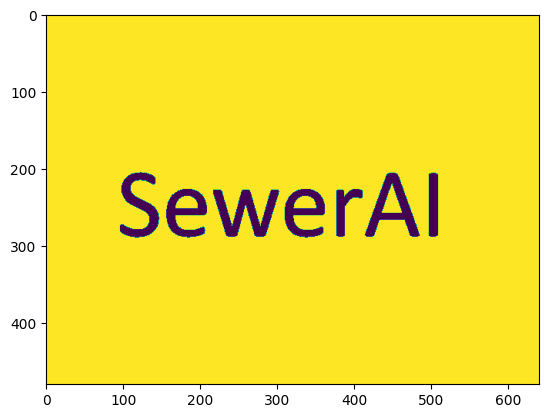

In [10]:
import cv2
import matplotlib.pyplot as plot
import numpy as np

# decoder function
def RLE_decoder(rle):
  rle = list(rle)
  flattened_image = []
  for i,e in enumerate(rle):
    if i % 2:
      flattened_image.extend([0]*e)
    else:
      flattened_image.extend([1]*e)
  return flattened_image

# create 2d image from flattened image
def flattened_to_2dImage(flattened_image):
  # image = np.array(640,480)
  # iterate over the flattened image and generate the 2d image
  image = np.array(flattened_image).reshape(480, 640)
  return image



def display_rle_image(rle):
  # call the decoder
  flattened_image = RLE_decoder(rle)
  # call the 2d image generator
  image = flattened_to_2dImage(flattened_image)
  plot.imshow(image)


display_rle_image(rle)